# Assignment 3 - Supervised Learning

## *Ruiqi Wang*
Netid:  *rw195*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

**(a)**

$
\begin{aligned}
L(\mathbf{w}) &= \prod_{i}P(Y=0|X=x_i)^{1-y_i} P(Y=1|X=x_i)^{y_i}\\
     &= \prod_{i} \left(1-\sigma(\mathbf{w}^T\mathbf{x}_i)\right)^{1-y_i} \left(\sigma(\mathbf{w}^T\mathbf{x}_i)\right)^{y_i} \\
     &= \prod_{i} \left(\frac{1}{1+e^{\mathbf{w}^T\mathbf{x}_i}}\right)^{1-y_i}\left(\frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}}\right)^{y_i}
\end{aligned}
$

**(b)**

Derived from (a),

$
\begin{aligned}
C(\mathbf{w}) &= -ln(L(\mathbf{w})) \\
              &= \sum_i \left(ln(1+e^{\mathbf{w}^T\mathbf{x}_i}) - y_i(\mathbf{w}^T\mathbf{x}_i) \right)
\end{aligned}
$


**(c)**

$
\begin{aligned}
\frac{\partial C}{\partial w_0} &= \sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} - \sum_{i} y_i \\  
\frac{\partial C}{\partial w_1} &= \sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,1} - \sum_{i} x_{i,1}y_i \\
\frac{\partial C}{\partial w_2} &= \sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,2} - \sum_{i} x_{i,2}y_i
\end{aligned} \\
$

$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\begin{array}{c} \frac{\partial C}{\partial w_0} \\ \frac{\partial C}{\partial w_1} \\ \frac{\partial C}{\partial w_2}\end{array}\right]^T = \left[\begin{array}{c}
\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} - \sum_i y_i \\ 
\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,1} - \sum_i x_{i,1}y_i \\
\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,2} - \sum_i x_{i,2}y_i
\end{array}\right]^T$

**(d)**

Derived from (c),

$
\left[\begin{array}{c} w_{t+1,0}\\w_{t+1,1}\\w_{t+1,2} \end{array}\right]^T = \left[\begin{array}{c} w_{t,0}\\w_{t,1}\\w_{t,2} \end{array}\right]^T - \eta\,\left[\begin{array}{c}
\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} - \sum_{i} y_i \\
\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,1} - \sum_i x_{i,1}y_i \\
\sum_i \frac{e^{\mathbf{w}^T\mathbf{x}_i}}{1+e^{\mathbf{w}^T\mathbf{x}_i}} x_{i,2} - \sum_i x_{i,2}y_i
\end{array}\right]^T
$

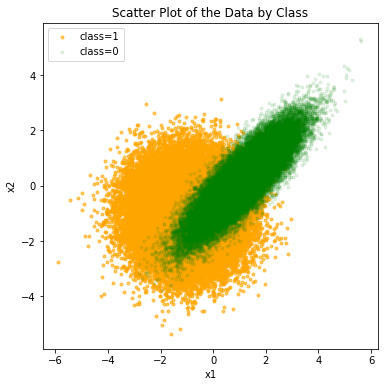

In [85]:
#(e) 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/A3_Q1_data.csv')

fig = plt.figure(figsize=(6,6))
plt.scatter(data.x1[data.y==1], data.x2[data.y==1], marker = '.', c = 'orange', label = 'class=1',alpha=0.6)
plt.scatter(data.x1[data.y==0], data.x2[data.y==0], marker = '.', c = 'green', label = 'class=0',alpha=0.1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Scatter Plot of the Data by Class')
plt.show()


From the scatter plot above, it can be seen that relatively large portions of the two classes of the data overlap each other, making it less seperable by logistic regression, the boundary line of which would be a straight line (unless transformation was applied).

In [86]:
#(f)
import numpy as np

np.sum(data.isna())

x1    0
x2    0
y     0
dtype: int64

In [87]:
data.describe()

,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


From the results above, it is unlikely that there are missing values or scale differences in the dataset.

In [88]:
#(g)
def sigmoid(x,w):
    x = np.array(x)
    w = np.array(w)
    x = np.c_[np.ones((x.shape[0], 1)), x]
    expn = np.exp(-np.dot(x,w))
    return (1+expn)**(-1)

def predict(x,w):
    return sigmoid(x,w) > 0.5

In [89]:
#(h)
def cost(x,y,w):
    x = np.array(x)
    w = np.array(w)
    y = np.array(y)
    x = np.c_[np.ones((x.shape[0], 1)), x]
    exp = np.exp(np.dot(x,w))
    return (np.sum(np.log(1+exp)-y*(np.dot(x,w))))/x.shape[0]

In [90]:
#(i)(j)(k)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data[['x1','x2']], data['y'],test_size = 0.3, random_state = 29)

In [91]:
def gradient(x,y,w):
    x = np.array(x)
    w = np.array(w)
    y = np.array(y)
    x = np.c_[np.ones((x.shape[0], 1)), x]
    exp = np.exp(-np.dot(x,w))
    n = x.shape[0]
    g0 = (np.sum(1/(1+exp)) - np.sum(y))/n
    g1 = (np.sum((1/(1+exp))*x[:,1]) - np.sum(x[:,1]*y))/n
    g2 = (np.sum((1/(1+exp))*x[:,2]) - np.sum(x[:,2]*y))/n
    return np.array([g0,g1,g2])

In [92]:
np.random.seed(29)

def descent(x_train,y_train,x_test,y_test, eta, epoch, plot=False):
    w = np.random.random(3)
    dist = 1   
    cost_train = []
    cost_test = []
    cnt = 0
    
    while dist > 1e-6 and cnt < epoch:
        cost_train.append(cost(x_train,y_train,w))
        cost_test.append(cost(x_test,y_test,w))
        n0 = np.linalg.norm(w)
        w = w-eta*gradient(x_train,y_train,w)
        n1 = np.linalg.norm(w)
        dist = np.abs(n1-n0)
        cnt += 1
    
    if plot == False:
        return w, cost_train, cost_test
    else:
        plt.plot(cost_train,'-', label = 'eta={} (train)'.format(eta),alpha=0.5)
        plt.plot(cost_test,'.', label = 'eta={} (test)'.format(eta), alpha=0.3)
        print('eta = {}, iterated for {} times.'.format(eta,cnt))

eta = 0.1, iterated for 800 times.
eta = 0.2, iterated for 715 times.
eta = 0.4, iterated for 397 times.
eta = 0.8, iterated for 149 times.


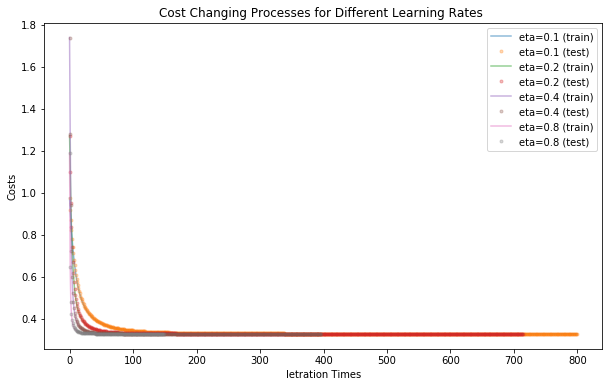

In [93]:
etas = [0.1,0.2,0.4,0.8]
plt.figure(figsize = (10, 6))

for i in etas:
    descent(x_train,y_train,x_test,y_test,i,800,plot = True)   

plt.title("Cost Changing Processes for Different Learning Rates ")
plt.xlabel("Ietration Times")
plt.ylabel("Costs")
plt.legend()
plt.show() 

From the outcomes of the iteration times and the plot above, it can be seen taht the larger the learning rate (eta), the fewer the iteration times, in other words, the faster the cost decreases. When eta = 0.1, the number of iteration times exceeds the limit of 800, whereas when eta = 0.8, the number of iteration times is only 147. This observation agrees with the nature of the learning rate. 

The choice of the learning rate is a trade-off between the efficiency and accuracy. On the one hand, when eta is too big, the true cost minimum could possibily be missed. On the other hand, too small eta may result in long computation time. For the remaining questions I choose eta=0.4 as a balance of the trade-off.

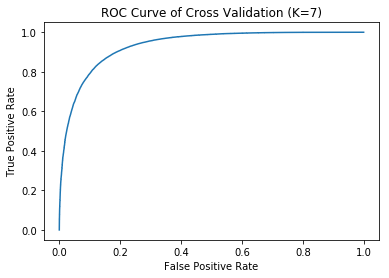

In [94]:
#(l)
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

X = np.c_[np.array(data.x1), np.array(data.x2)]
y = np.array(data.y)
skf = StratifiedKFold(n_splits=7)

plt.figure(figsize = (6, 4))
y_hat = np.zeros_like(y)

for i,j in skf.split(X,y):
    x_traincv, x_testcv = X[i], X[j]
    y_traincv, y_testcv = y[i], y[j]
    w = descent(x_traincv,y_traincv,x_testcv,y_testcv, 0.4, 1000, plot=False)[0]
    y_hat[j] = sigmoid(x_testcv, w)
    
fp, tp, thresh = roc_curve(y, y_hat, pos_label=1)
plt.plot(fp, tp)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Cross Validation (K=7)')
plt.show()


***(m)***
The process of fitting our model is based on the training data, where we expect a small error rate (or some other measures). However, just because of seeing the low error rate of the training data, we can not assume that the model would also perform well on the testing data. Therefore, we need to use cross validation to extend the performance of the model on the trainging data to the testing data.

In [95]:
#(n)
x1trainmin = x_train.min()[0]-0.5; x1trainmax = x_train.max()[0]+0.5
x2trainmin = x_train.min()[1]-0.5; x2trainmax = x_train.max()[1]+0.5
x1testmin = x_test.min()[0]-0.5; x1testmax = x_test.max()[0]+0.5
x2testmin = x_test.min()[1]-0.5; x2testmax = x_test.max()[1]+0.5

xx1train, xx2train = np.meshgrid(np.arange(x1trainmin, x1trainmax, 0.05), np.arange(x2trainmin, x2trainmax, 0.05))
ytrain = sigmoid(np.c_[xx1train.ravel(),xx2train.ravel()],w)
ytrain = ytrain.reshape(xx1train.shape)

xx1test, xx2test = np.meshgrid(np.arange(x1testmin, x1testmax, 0.05), np.arange(x2testmin, x2testmax, 0.05))
ytest = sigmoid(np.c_[xx1test.ravel(),xx2test.ravel()],w)
ytest = ytest.reshape(xx1test.shape)

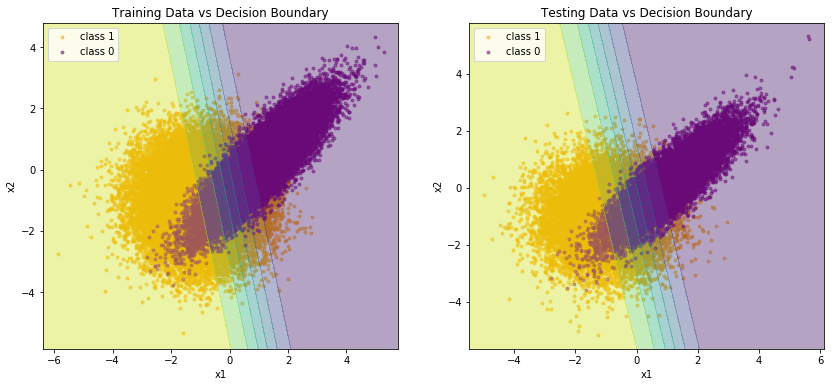

In [96]:
plt.figure(figsize=(14,6))

ax=plt.subplot(1,2,1)
ax.scatter(x_train.iloc[:,0][y_train==1], x_train.iloc[:,1][y_train==1], marker = '.', c = 'orange', label = 'class 1',alpha=0.5)
ax.scatter(x_train.iloc[:,0][y_train==0], x_train.iloc[:,1][y_train==0], marker = '.', c = 'purple', label = 'class 0',alpha=0.5)
ax.contourf(xx1train, xx2train, ytrain, alpha = 0.4)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
ax.set_title('Training Data vs Decision Boundary')

ax=plt.subplot(1,2,2)
ax.scatter(x_test.iloc[:,0][y_test==1], x_test.iloc[:,1][y_test==1], marker = '.', c = 'orange', label = 'class 1',alpha=0.5)
ax.scatter(x_test.iloc[:,0][y_test==0], x_test.iloc[:,1][y_test==0], marker = '.', c = 'purple', label = 'class 0',alpha=0.5)
ax.contourf(xx1test, xx2test, ytest, alpha = 0.4)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
ax.set_title('Testing Data vs Decision Boundary')
plt.show()

From the plots above, it is apparent that the model coulde be improved, based on the observation that there are still many mis-classifications on the two sides of the straight boundary lines.

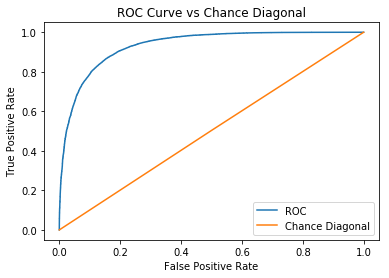

The AUC achieved by my logistics model is 0.933073
The AUC achieved by random guessing is 0.501570


In [97]:
#(o)
y_hat = sigmoid(x_test, w)
fp, tp, thresh = roc_curve(y_test, y_hat, pos_label=1)
auc_log = auc(fp,tp)
plt.plot(fp, tp, label='ROC')

y_rd = np.random.randint(2, size = 30000)
fp, tp, thresh = roc_curve(y_test, y_rd, pos_label=1)
auc_rd = auc(fp,tp)
plt.plot(fp, tp, label='Chance Diagonal')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve vs Chance Diagonal')
plt.legend()
plt.show()

print ('The AUC achieved by my logistics model is {:2f}'.format(auc_log))
print ('The AUC achieved by random guessing is {:2f}'.format(auc_rd))

The ROC curve for my model is in good shape (converges towards the left upper corner), and the AUC is quite near to 1 (0.933073), while the AUC of random guessing is 0.500638. Therefore, the performance of my logistics model is good compared with random guessing.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

In [98]:
#(a)
img_train = np.fromfile('data/train-images.idx3-ubyte', dtype = 'ubyte')[16:].reshape(60000, 784)
img_test = np.fromfile('data/t10k-images.idx3-ubyte', dtype = 'ubyte')[16:].reshape(10000,784)
lab_train = np.fromfile('data/train-labels.idx1-ubyte', dtype = 'ubyte')[8:]
lab_test = np.fromfile('data/t10k-labels.idx1-ubyte', dtype = 'ubyte')[8:]

lab_train[lab_train!=3] = 0
lab_train[lab_train==3] = 1
lab_test[lab_test!=3] = 0
lab_test[lab_test==3] = 1

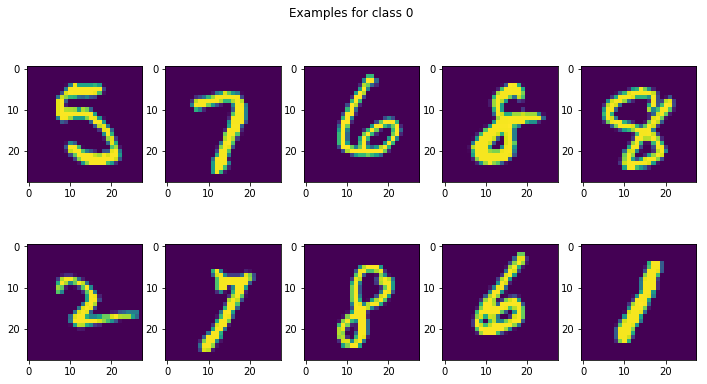

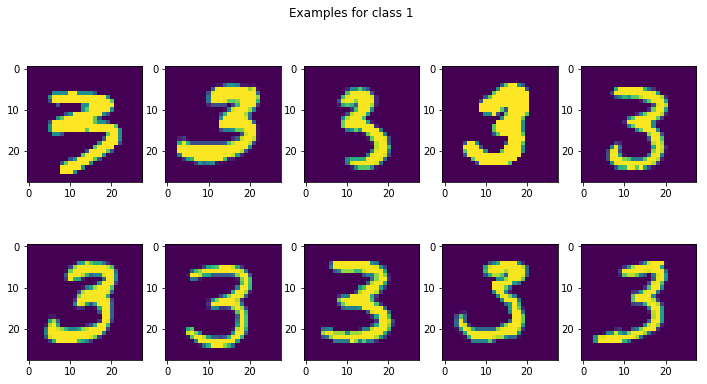

In [99]:
#(b)
np.random.seed(29)

index_1 = np.argwhere(lab_train==1).ravel()[np.random.randint(sum(lab_train), size = 10)]
index_0 = np.argwhere(lab_train==0).ravel()[np.random.randint(60000-sum(lab_train), size = 10)]

plt.figure(figsize=(12,6))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    ax.imshow(img_train[index_0[i]].reshape(28,28))
plt.suptitle('Examples for class 0')
plt.show()

plt.figure(figsize=(12,6))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    ax.imshow(img_train[index_1[i]].reshape(28,28))
plt.suptitle('Examples for class 1')
plt.show()

In [100]:
#(c)
n1 = sum(lab_train)
n0 = lab_train.shape[0]-n1

print('There are {} examples in calss 0 in training data.'.format(n0))
print('There are {} examples in calss 1 in training data.'.format(n1))
print('The number of examples in class 0 is {:2f} times more than class 1 in training data.'.format(n0/n1))

There are 53869 examples in calss 0 in training data.
There are 6131 examples in calss 1 in training data.
The number of examples in class 0 is 8.786332 times more than class 1 in training data.


From the results above, it can be seen that there are a lot more class 0 examples than class 1. Therefore, the classes are unbalanced. In this situation, it is important to examine model matrics such as precision, TP rate, FP rate, etc.

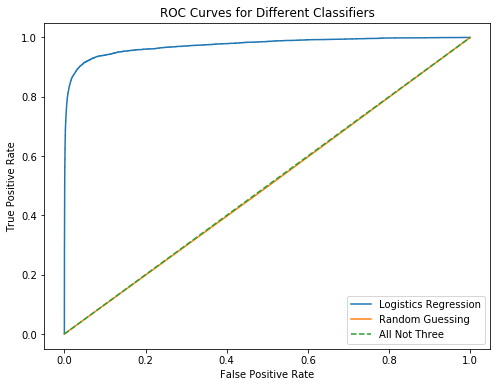

In [101]:
#(d)
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, roc_auc_score
np.random.seed(29)

plt.figure(figsize = (8, 6))

#logistics regression
lab_hat = np.zeros(lab_train.shape)

for i, j in skf.split(img_train, lab_train):    
    img_traincv, lab_traincv = img_train[i], lab_train[i]
    img_testcv, lab_testcv = img_train[j], lab_train[j]   
    with warnings.catch_warnings(): 
        warnings.simplefilter("ignore")
        lr = LogisticRegression(solver='lbfgs', max_iter=500, random_state=29).fit(img_traincv, lab_traincv)
        lab_hat[j] = lr.predict_proba(img_testcv)[:,1]

fpl, tpl, threshl = roc_curve(lab_train, lab_hat, pos_label=1)
plt.plot(fpl,tpl,label='Logistics Regression')

#random guess
lab_rd = np.random.randint(2, size = lab_train.shape[0])
fpr, tpr, thresh = roc_curve(lab_train, lab_rd, pos_label=1)
plt.plot(fpr, tpr, label='Random Guessing')

#all not 3
lab_3 = np.zeros(lab_train.shape)
fp3, tp3, thresh = roc_curve(lab_train, lab_3, pos_label=1)
plt.plot(fp3, tp3, '--', label='All Not Three')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend()
plt.show()    

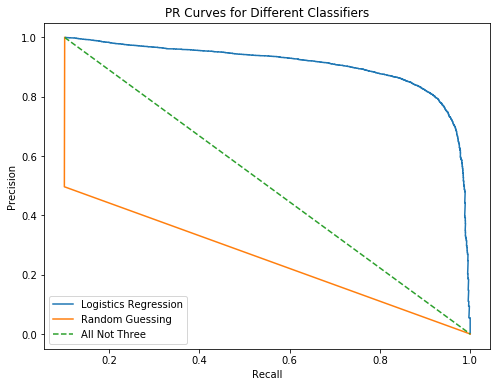

In [102]:
plt.figure(figsize = (8, 6))

pl,rl,t = precision_recall_curve(lab_train, lab_hat, pos_label=1)
pr,rr,t = precision_recall_curve(lab_train, lab_rd, pos_label=1)
p3,r3,t = precision_recall_curve(lab_train, lab_3, pos_label=1)

plt.plot(pl, rl, label='Logistics Regression')
plt.plot(pr, rr, label='Random Guessing')
plt.plot(p3, r3, '--', label='All Not Three')

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR Curves for Different Classifiers')
plt.legend()
plt.show()    

I chose logistic regression model to create my classifier. From the plots above, it can be seen that both the ROC curve and PR curve are in good shape for logistics regression classifier, since the ROC curve converges towards to the upper left and the PR curve converges to the upper right. The random guessing classifier performs worst, which matches the nature of gussing based on nothing. The "all not three" classifier performs a little better than random guessing because there not truly much more non-threes than threes in the data.

In [103]:
#(f)
cnt = []
costs = []
f1=[]
auc=[]

for i in np.logspace(3,-5,20):
    with warnings.catch_warnings(): 
        warnings.simplefilter("ignore")
        lr = LogisticRegression(penalty='l1', random_state=29, C = i).fit(img_train, lab_train)
        proba = lr.predict_proba(img_test)
        lab = lr.predict(img_test)
        cnt.append(np.sum(lr.coef_ != 0))
        cost = -np.sum(np.log(proba**np.c_[1-lab_test, lab_test]))/lab_test.shape
        costs.append(cost)
        f1.append(f1_score(lab_test, lab, pos_label=1))
        auc.append(roc_auc_score(lab_test, proba[:,1]))
print('ok')

ok


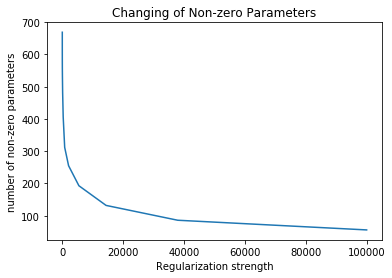

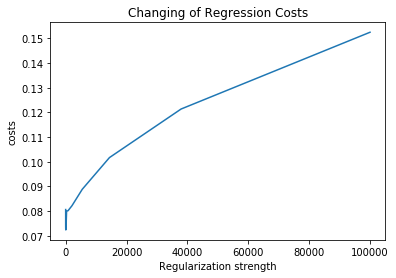

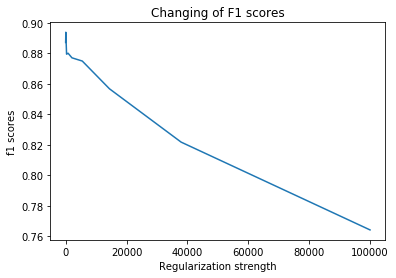

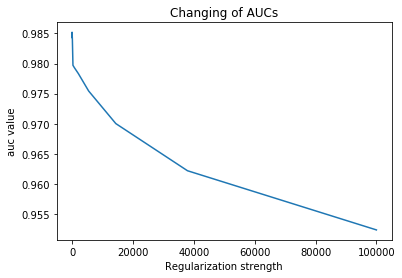

In [104]:
plt.plot(1/np.logspace(3,-5,20), cnt)
plt.title('Changing of Non-zero Parameters')
plt.xlabel('Regularization strength')
plt.ylabel('number of non-zero parameters')
plt.show()

plt.plot(1/np.logspace(3,-5,20), costs)
plt.title('Changing of Regression Costs')
plt.xlabel('Regularization strength')
plt.ylabel('costs')
plt.show()

plt.plot(1/np.logspace(3,-5,20), f1)
plt.title('Changing of F1 scores')
plt.xlabel('Regularization strength')
plt.ylabel('f1 scores')
plt.show()

plt.plot(1/np.logspace(3,-5,20), auc)
plt.title('Changing of AUCs')
plt.xlabel('Regularization strength')
plt.ylabel('auc value')
plt.show()

From the results above, it can be seen that the larger the regularization strength, 1. the fewer the non-zero parameters; 2. the greater the regression cost; 3. the smaller the F1 score; 4. the smaller the AUC. Therefore, there is a trade-off between computation efficiency (here, achieved by demension reduction) and the performance of the model.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**(a)**

The question I am interested in is to recoganize a person's gender by his/her voice, to be more specific, based on the properties of the voice and speech. This arouse my interest because this classification has the potential to be further applied to many fields in the future, such as entertainment industry, criminal identification, etc. In the exploration of this question, I will use logistic regression model to generate a classifier to tell genders based on the features of voice. 

The dataset I am going to use is from Kaggle- Gender Recognition by Voice  (https://www.kaggle.com/primaryobjects/voicegender/home).

***The codebook from Kaggle:***
- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female

***(b)***
Read in data and see the first few lines to know the features

In [105]:
voice = pd.read_csv('data/voice.csv') 
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


From the table below, temporarily there is no need to rescale.

In [106]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [107]:
np.sum(voice.isna())

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

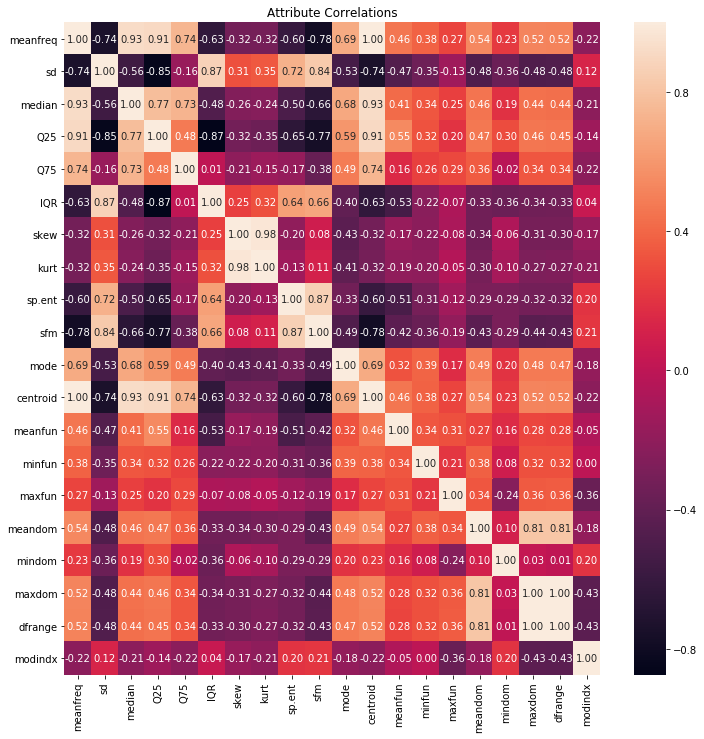

In [108]:
import seaborn as sns

plt.subplots(figsize=(12,12))
sns.heatmap(voice.corr(),annot=True,fmt=".2f")
plt.title("Attribute Correlations")
plt.show()

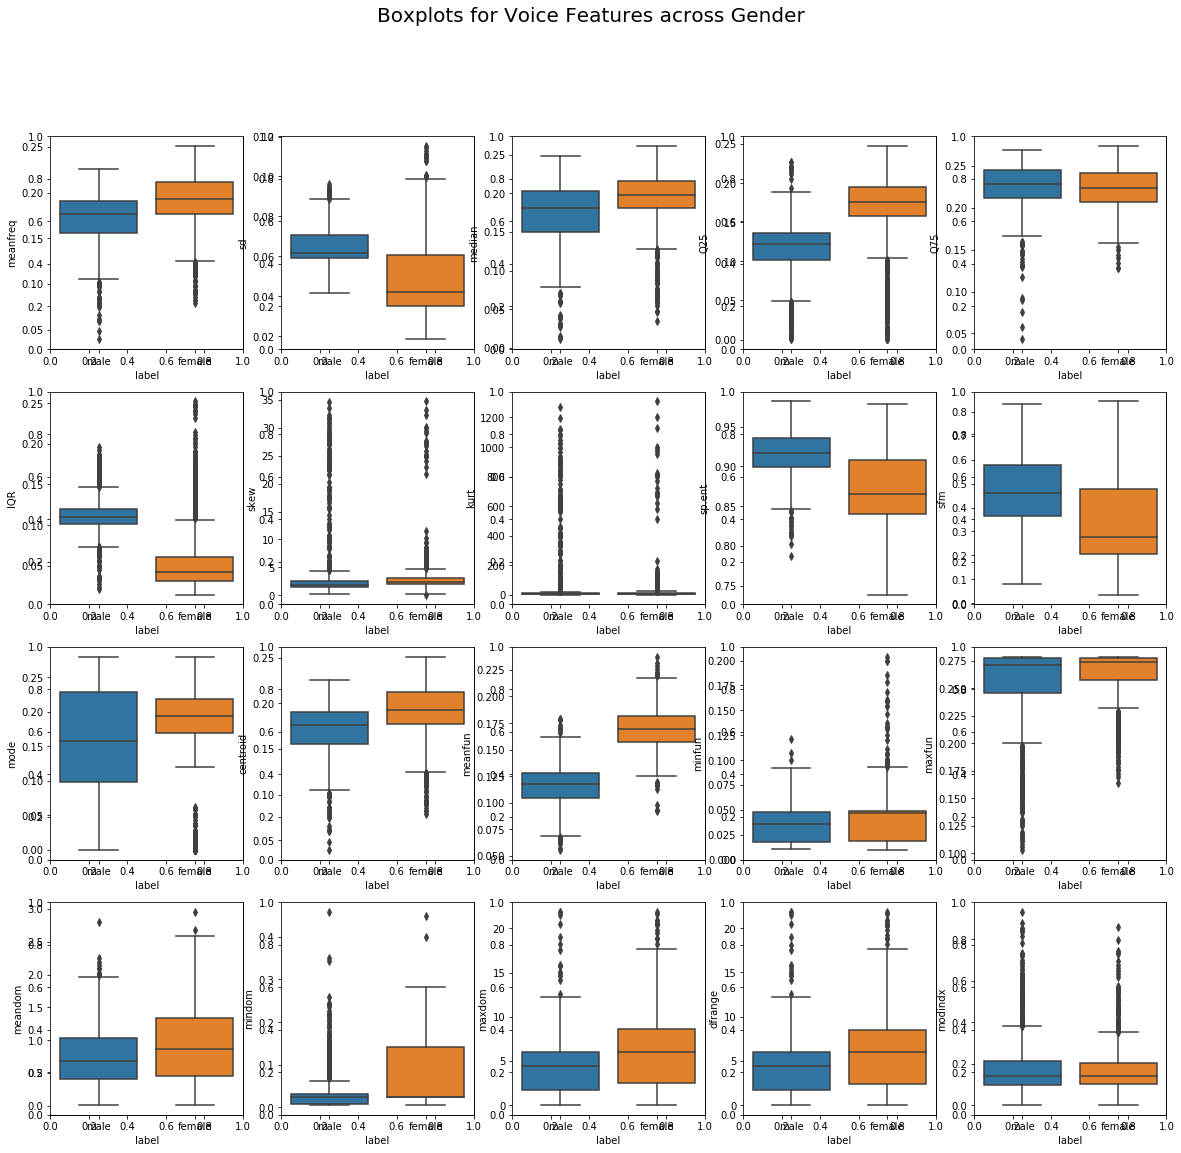

In [109]:
fig, axs = plt.subplots(4, 5, figsize=(20,18))

features = ['meanfreq','sd','median','Q25','Q75','IQR','skew','kurt','sp.ent','sfm','mode','centroid',
            'meanfun','minfun','maxfun','meandom','mindom','maxdom','dfrange','modindx','label']

for i in range(20):
    ax = fig.add_subplot(4,5,i+1)
    sns.boxplot(data=voice, x ='label',y=features[i])

plt.suptitle('Boxplots for Voice Features across Gender', fontsize=20)
plt.show()

**(c)**
- a. My target variable is 'label', the value of which is 'male' or 'female', to be converted to 0 and 1 later. 
- b. The predictors availables are the 20 voice features in the boxplots above.
- c. From the results in (b), we can see that there are no missing or erroneous values in the dataset, and the features are in similar scales.
- d. One thing needs to be mentioned is that not all the 20 features would be included in my model, as some of the features are highly correlated with each other (with the correlations higher than 0.9), and some features can not represent well the voice differences by gender (such as the duration of the records, which is irrelavant to gender). Therefore I would use PCA to reduce the demension of my model to generate a more accurate and interpretable result.

**(d)** For this question I will apply logistics regression to achieve my analysis for the reason that the outcome (label) of the model would be gender, namely female and male, which is a binary outcome. This matches the nature of logistics classfication.

**(e)** For this question, I will use ROC curves to evaluate the performance of my model, as this is suitable for the binary classification. I will expect my ROC curve to converge towards upper left, which would suggest a high TP rate (recall) and a low FP rate.


**(f)** The trade-off of the train-test split is that if there are not enough observations in the training set, the model could not be trained to be very accurate; and if there are not enough observations in the testing set, the performance of the model could not be validated well. Considering that there are only about 3000 observations in my dataset, the computation load of cross validation would not be heavy, therefore I decide to use k-fold cross validation with k = 5 to examime the performance of my model. The reason for the choice of k is that if k is too big, the examine in each fold would not be accurate as there would not be sufficient observations. If k is too small, the cross validation would lose its advantages over simple train-test split.

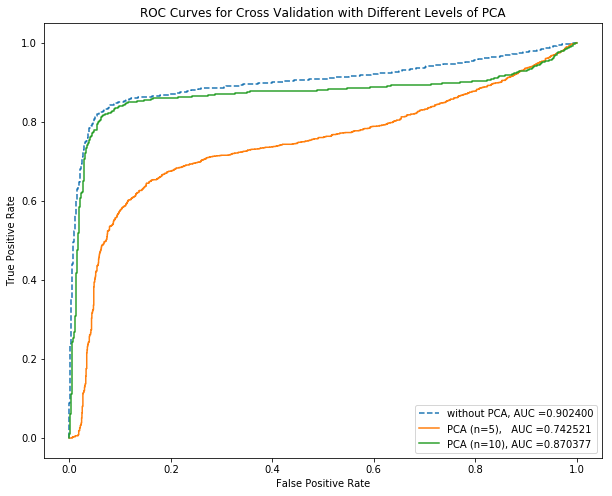

In [112]:
#(g)
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc

voice=np.array(voice)
x = voice[:,:20]
y = voice[:,20]
y[y=='male'] = 0; y[y=='female'] = 1
y = y.astype('int')
skf = StratifiedKFold(n_splits=5)

y_hat = np.zeros(y.shape)
y_hat_5 = np.zeros(y.shape)
y_hat_10 = np.zeros(y.shape)

plt.figure(figsize = (10, 8))

for i,j in skf.split(x,y):
    x_train, x_test = x[i], x[j]
    y_train, y_test = y[i], y[j]
    with warnings.catch_warnings(): 
        warnings.simplefilter("ignore")
        lr = LogisticRegression(solver='lbfgs', max_iter=500, random_state=29).fit(x_train, y_train)
        y_hat[j] = lr.predict_proba(x_test)[:,1]

for i,j in skf.split(x,y):
    x_train, x_test = x[i], x[j]
    y_train, y_test = y[i], y[j]
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)
    with warnings.catch_warnings(): 
        warnings.simplefilter("ignore")
        lr = LogisticRegression(solver='lbfgs', max_iter=500, random_state=29).fit(x_train, y_train)
        y_hat_5[j] = lr.predict_proba(x_test)[:,1]
        
pca = PCA(n_components=5, random_state=29)
for i,j in skf.split(x,y):
    x_train, x_test = x[i], x[j]
    y_train, y_test = y[i], y[j]
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)
    with warnings.catch_warnings(): 
        warnings.simplefilter("ignore")
        lr = LogisticRegression(solver='lbfgs', max_iter=500, random_state=29).fit(x_train, y_train)
        y_hat_5[j] = lr.predict_proba(x_test)[:,1]

        
pca = PCA(n_components=10, random_state=29)
for i,j in skf.split(x,y):
    x_train, x_test = x[i], x[j]
    y_train, y_test = y[i], y[j]
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)
    with warnings.catch_warnings(): 
        warnings.simplefilter("ignore")
        lr = LogisticRegression(solver='lbfgs', max_iter=500, random_state=29).fit(x_train, y_train)
        y_hat_10[j] = lr.predict_proba(x_test)[:,1]

fp, tp, thr = roc_curve(y, y_hat, pos_label=1)
a = auc(fp,tp)
plt.plot(fp,tp, '--',label='without PCA, AUC ={:2f}'.format(a))        
fp, tp, thr = roc_curve(y, y_hat_5, pos_label=1)
a = auc(fp,tp)
plt.plot(fp,tp, label='PCA (n=5),   AUC ={:2f}'.format(a))
fp, tp, thr = roc_curve(y, y_hat_10, pos_label=1)
a = auc(fp,tp)
plt.plot(fp,tp, label='PCA (n=10), AUC ={:2f}'.format(a))
plt.legend(loc='lower right')
plt.title('ROC Curves for Cross Validation with Different Levels of PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**(h)** 

From the results of ROC curves and AUC values from the cross validation above, it can be seen that the classifier trained by logistic regression works fine with all variables are included as original, or with the demensions of variables reduced to half, since the AUC values are 0.902400 and 0.870377 seperately and the ROC curces converges to the upper left. The reason for this result is that first, there are only more than 3000 observatons in the dataset, and 20 features is not too many. However, if the demension is reduced to only 5 (1/4 of the orginal), the performance of the model gets hurt more. 

To improve the model, more classification method such as random forest, SVM, etc. could also considered and compared. More background knowledge of voice, speech, gender differences, etc are also necessary. Finally, more samples are need to achieve better performance of the classification.

**(i)**

This project will have a impact on real life is such a way as this classification could be applied to many fields in the future, such as human identity verification, criminal detection, etc. Therefore, it has the potential to benefit all walks of life. 